<a href="https://colab.research.google.com/github/diwakarg05/Project/blob/main/ASSIGN_2%2CDAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scheduled Slots: [-1, 'B', 'A', 'E']
Total Profit: 180


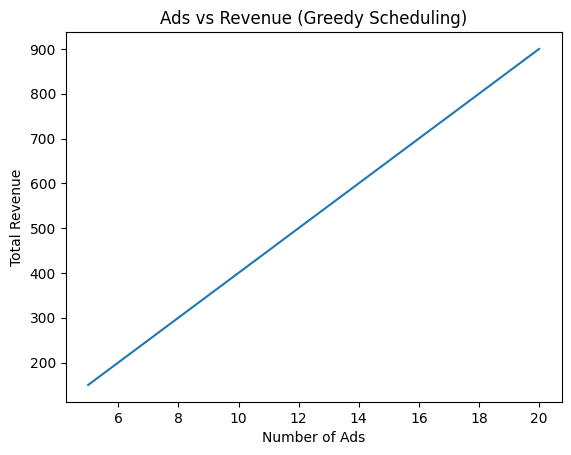

In [1]:
# ---------------------------
# Problem 1: TV Commercial Scheduling (Greedy)
# ---------------------------

import matplotlib.pyplot as plt
import time

# Function to schedule ads using Greedy strategy
def schedule_ads(ads):
    # ads = [(id, deadline, profit)]

    # Sort by profit (highest first)
    ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)

    # Find max deadline to create slots
    max_deadline = max(ad[1] for ad in ads_sorted)

    schedule = [-1] * (max_deadline + 1)  # slot index starts at 1
    total_profit = 0

    for ad_id, deadline, profit in ads_sorted:
        # Try to place the ad in its deadline slot or earlier
        for slot in range(deadline, 0, -1):
            if schedule[slot] == -1:
                schedule[slot] = ad_id
                total_profit += profit
                break

    return schedule, total_profit

# Sample test
ads = [
    ("A", 2, 100),
    ("B", 1, 50),
    ("C", 2, 10),
    ("D", 1, 20),
    ("E", 3, 30)
]

schedule, profit = schedule_ads(ads)
print("Scheduled Slots:", schedule)
print("Total Profit:", profit)

# Plot example: num ads vs revenue
sizes = [5, 10, 15, 20]
profits = []

for s in sizes:
    test_ads = [("Ad" + str(i), (i % 5) + 1, i * 10) for i in range(1, s+1)]
    _, p = schedule_ads(test_ads)
    profits.append(p)

plt.plot(sizes, profits)
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue")
plt.title("Ads vs Revenue (Greedy Scheduling)")
plt.show()


Maximum Profit: 250


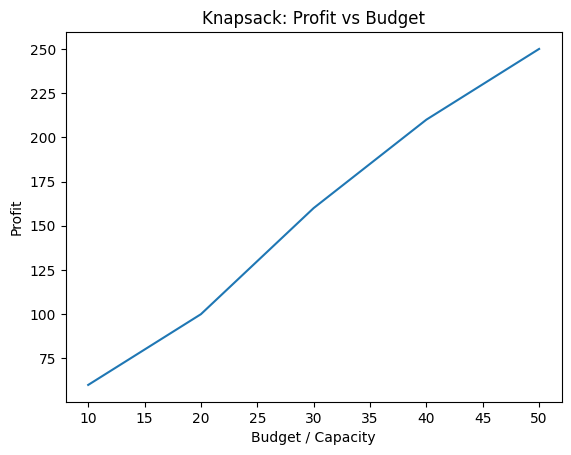

In [2]:
# ---------------------------
# Problem 2: 0/1 Knapsack (Dynamic Programming)
# ---------------------------

import matplotlib.pyplot as plt
import time

def knapsack(values, weights, capacity):
    n = len(values)

    # dp table (n+1) x (capacity+1)
    dp = [[0]*(capacity + 1) for _ in range(n + 1)]

    # Build DP table
    for i in range(1, n+1):
        for w in range(capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(
                    values[i-1] + dp[i-1][w - weights[i-1]],
                    dp[i-1][w]
                )
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]

# Sample input
values = [60, 100, 150]
weights = [10, 20, 30]
capacity = 50

print("Maximum Profit:", knapsack(values, weights, capacity))

# Plot example: capacity vs profit
caps = [10, 20, 30, 40, 50]
profits = []

for c in caps:
    profits.append(knapsack(values, weights, c))

plt.plot(caps, profits)
plt.xlabel("Budget / Capacity")
plt.ylabel("Profit")
plt.title("Knapsack: Profit vs Budget")
plt.show()


In [3]:
# ---------------------------
# Problem 3: Sudoku Solver (Backtracking)
# ---------------------------

def is_safe(grid, row, col, num):
    # Check row
    if num in grid[row]:
        return False

    # Check column
    for r in range(9):
        if grid[r][col] == num:
            return False

    # Check 3x3 box
    box_start_r = row - row % 3
    box_start_c = col - col % 3
    for r in range(box_start_r, box_start_r + 3):
        for c in range(box_start_c, box_start_c + 3):
            if grid[r][c] == num:
                return False

    return True

def solve_sudoku(grid):
    # Find empty cell (0 means empty)
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:

                # Try numbers 1–9
                for num in range(1, 10):
                    if is_safe(grid, row, col, num):
                        grid[row][col] = num

                        if solve_sudoku(grid):
                            return True

                        grid[row][col] = 0  # undo

                return False  # no number fits

    return True  # solved

# Sample grid
grid = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]

print("Solving Sudoku...")
solve_sudoku(grid)
for row in grid:
    print(row)


Solving Sudoku...
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


In [4]:
# ---------------------------
# Problem 4: Brute-Force Password Cracking
# ---------------------------

import itertools
import time

def brute_force(password, charset):
    attempts = 0
    start = time.time()

    # Try all lengths from 1 to len(password)
    for length in range(1, len(password) + 1):
        for combo in itertools.product(charset, repeat=length):
            attempts += 1
            guess = ''.join(combo)

            if guess == password:
                end = time.time()
                return guess, attempts, end - start

    return None, attempts, time.time() - start

# Example
password = "abc"
charset = "abc123"

guess, attempts, t = brute_force(password, charset)
print("Found:", guess)
print("Attempts:", attempts)
print("Time:", t, "seconds")


Found: abc
Attempts: 51
Time: 6.175041198730469e-05 seconds
